# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

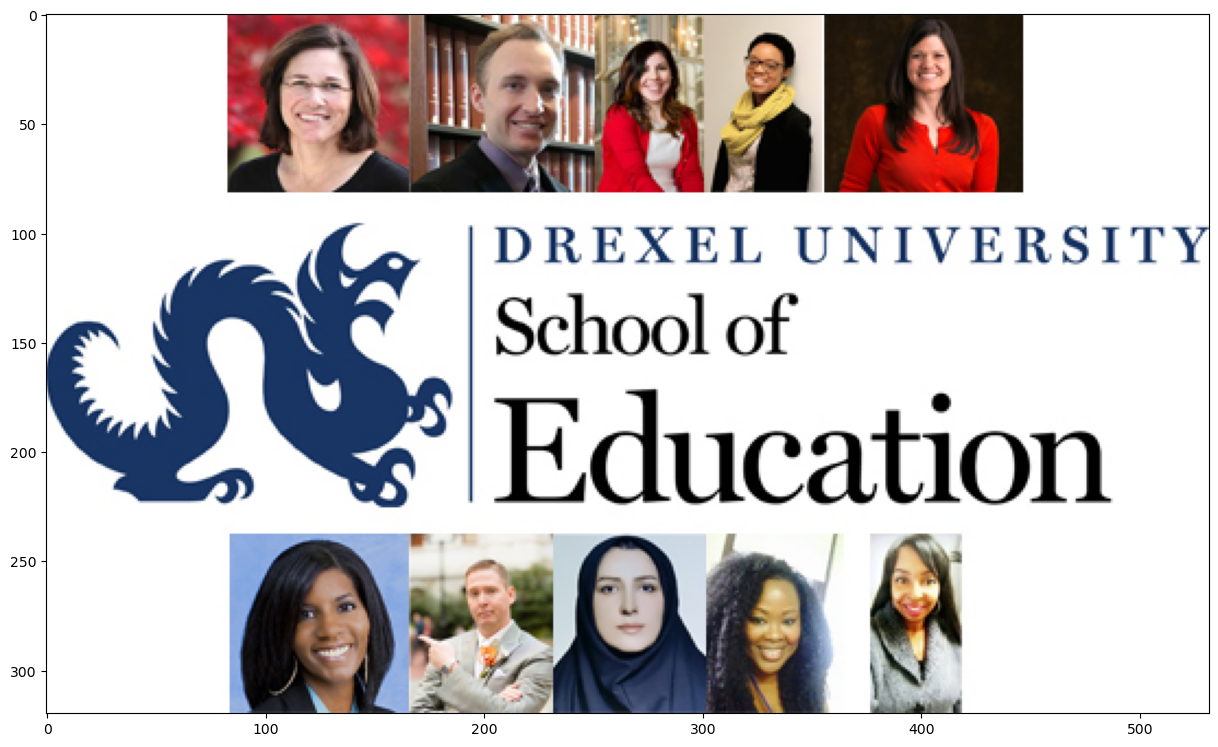

In [37]:
img_path = "newfaces-2016.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)


### Step 2

Load Viola-Jones detector

In [38]:
casc_path = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(casc_path)

In [39]:
def DetectFacesByViolaJonesDetector(img, gray):
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, flags=cv2.CASCADE_SCALE_IMAGE)

    print('Number of detected faces by Viola-Jones:', len(faces))

    # Draw rectangle around each face
    result = np.copy(img)
    faces_img = []
    for (x, y, w, h) in faces: 
    # Draw rectangle around the face
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 3)
        faces_img.append(img[y:y+h, x:x+w, :])
    
    return result
    

Number of detected faces by Viola-Jones: 7


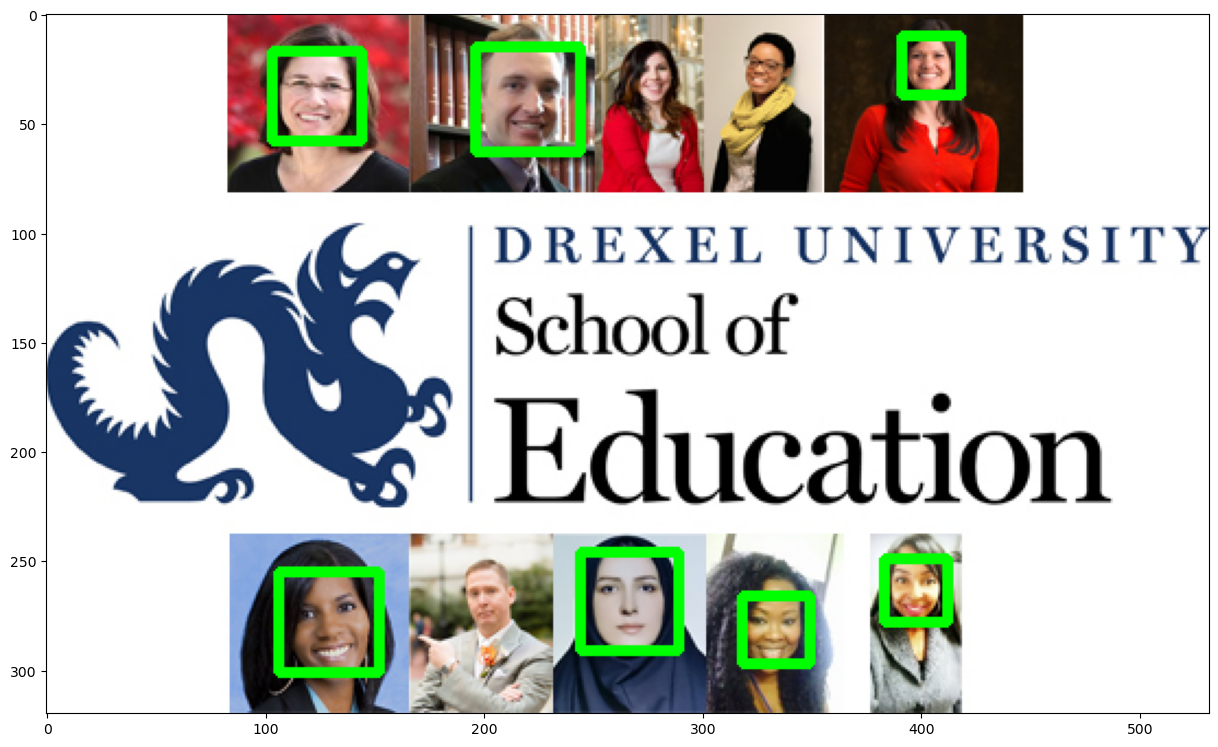

In [40]:
plt.imshow(DetectFacesByViolaJonesDetector(img, gray))

### Step 3

Load Retina Face Detector from DeepFace


In [41]:
from deepface import DeepFace

In [42]:
def DetectFacesByRetinaDetector(img, img_path):
   
    # Extract faces using 'retinaface' for high accuracy
    detected_faces = DeepFace.extract_faces(
        img_path=img_path,      # Image Setup (Using OpenCV to read, though DeepFace accepts the path directly)
        detector_backend='retinaface', 
        enforce_detection=True  
    )

    print(f"Successfully detected {len(detected_faces)} face(s) using RetinaFace.")

    result = np.copy(img)
    
    # Process and visualize the output
    for i, face_obj in enumerate(detected_faces):
        area = face_obj['facial_area']
        
        # Bounding box coordinates (x, y, width, height)
        x, y, w, h = area['x'], area['y'], area['w'], area['h']
        
        # Draw the rectangle
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    return result            

# Show the result 

Successfully detected 10 face(s) using RetinaFace.


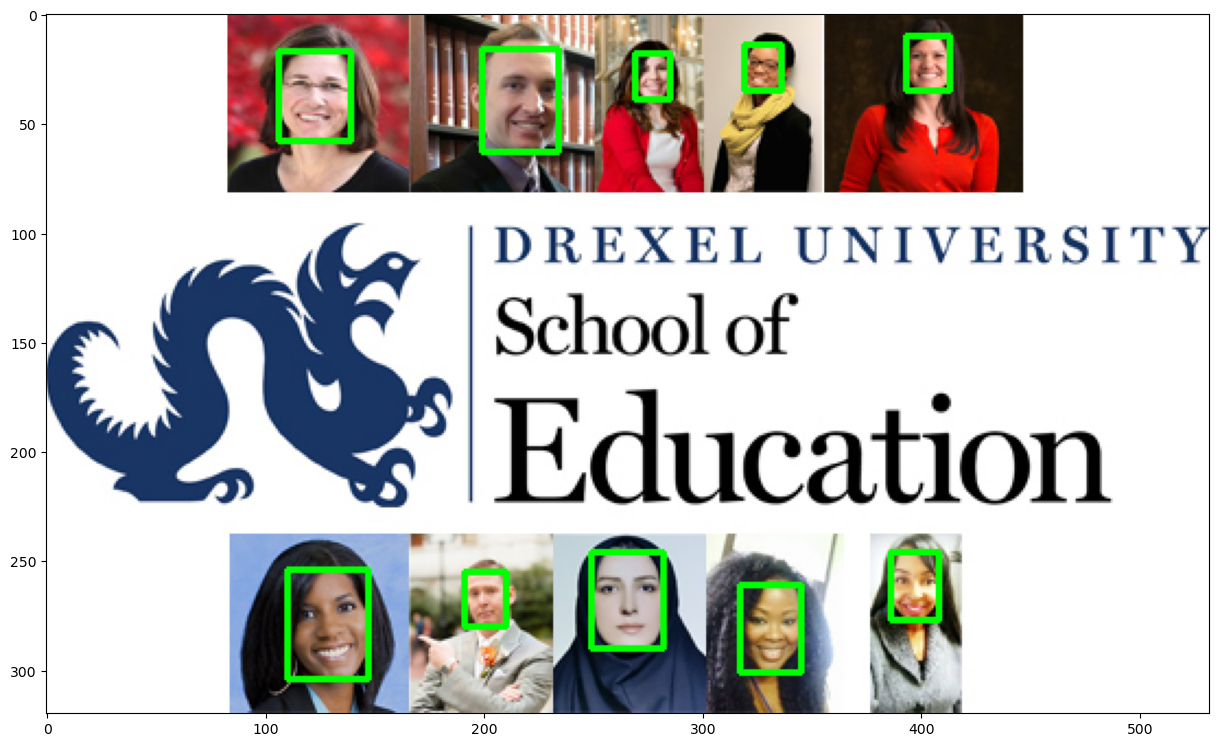

In [43]:
result = DetectFacesByRetinaDetector(img, img_path)
plt.imshow(result)


### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

Number of detected faces by Viola-Jones: 14
Successfully detected 15 face(s) using RetinaFace.


(<Axes: >, <matplotlib.image.AxesImage at 0x1af93081790>)

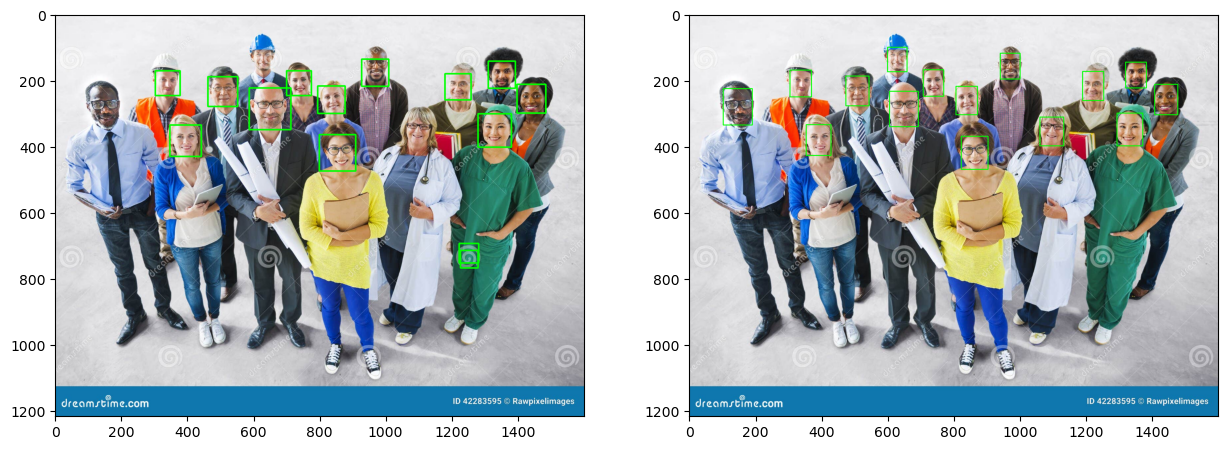

In [44]:
img_path = "diverse-multiethnic-people-different-jobs-42283595.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

res1 = DetectFacesByViolaJonesDetector(img, gray)
res2 =  DetectFacesByRetinaDetector(img, img_path)

plt.subplot(121), plt.imshow(res1)
plt.subplot(122), plt.imshow(res2)

Number of detected faces by Viola-Jones: 7
Successfully detected 7 face(s) using RetinaFace.


(<Axes: >, <matplotlib.image.AxesImage at 0x1af94c21790>)

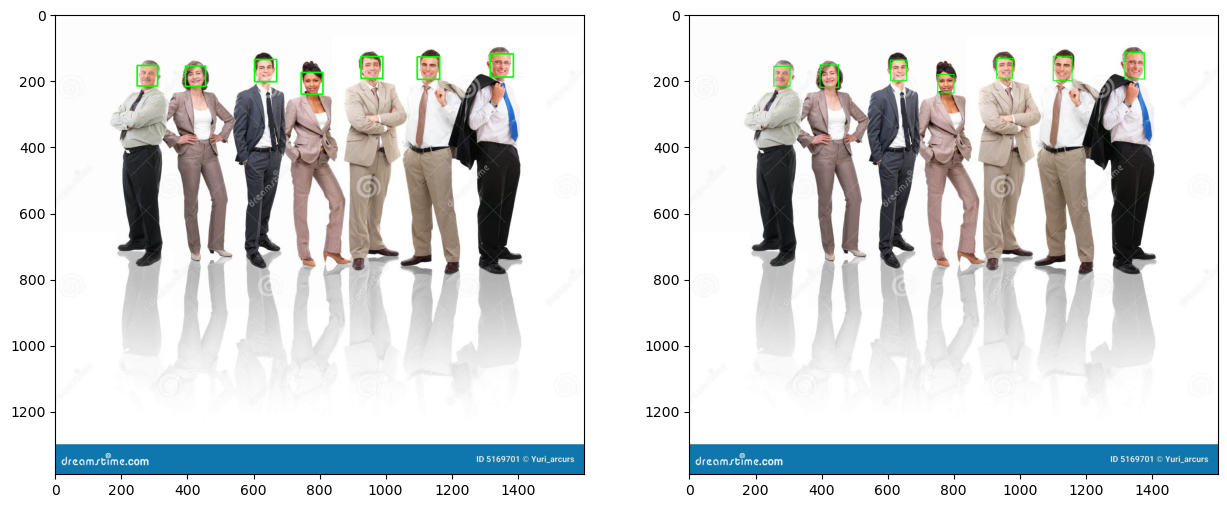

In [45]:
img_path = "business-groups-different-people-line-con-5169701.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

res1 = DetectFacesByViolaJonesDetector(img, gray)
res2 =  DetectFacesByRetinaDetector(img, img_path)

plt.subplot(121), plt.imshow(res1)
plt.subplot(122), plt.imshow(res2)

Number of detected faces by Viola-Jones: 7
Successfully detected 7 face(s) using RetinaFace.


(<Axes: >, <matplotlib.image.AxesImage at 0x1af94c73990>)

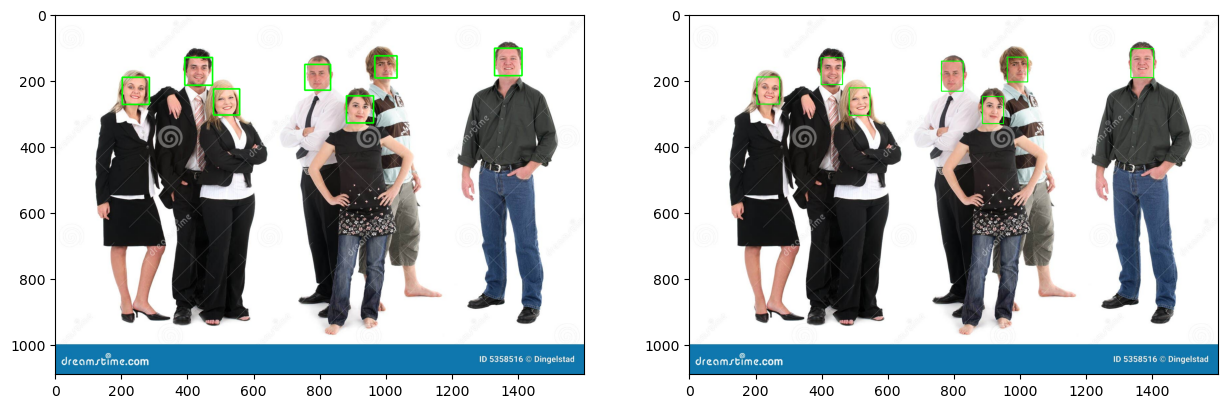

In [46]:
img_path = "group-different-people-5358516.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

res1 = DetectFacesByViolaJonesDetector(img, gray)
res2 =  DetectFacesByRetinaDetector(img, img_path)

plt.subplot(121), plt.imshow(res1)
plt.subplot(122), plt.imshow(res2)

Number of detected faces by Viola-Jones: 27
Successfully detected 36 face(s) using RetinaFace.


(<Axes: >, <matplotlib.image.AxesImage at 0x1af971469d0>)

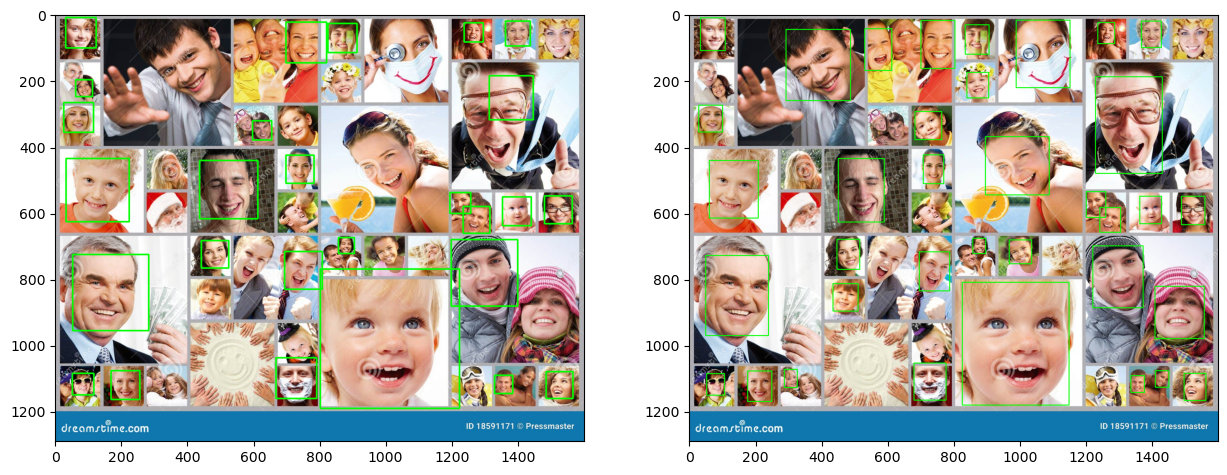

In [47]:
img_path = "different-people-18591171.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

res1 = DetectFacesByViolaJonesDetector(img, gray)
res2 =  DetectFacesByRetinaDetector(img, img_path)

plt.subplot(121), plt.imshow(res1)
plt.subplot(122), plt.imshow(res2)

In [48]:
# Viola-Jones performs quite good for faces what look forward and are not inclined. Taking into account it works so fast I expected 
# it to make less detections. However it detected quite a lot faces on the last photo (and before). 
# May be Viola-Jones is not as robust as Retina (from DeepFace), but it works much faster 